<a href="https://colab.research.google.com/github/Katerine-Chanci-Echeverri/Project-2---Spaceship-Titanic/blob/main/Proyecto2_Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 2 - Parte 1 (base)**

## **Datos personales**

*   **Nombre:** Katerine Chancí Echeverri
*   **ID Coding Dojo:** 80837
*   **Track:** Machine Learning


## **Descripción del problema**

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

## **Descripción del conjunto de datos**

| Column                                            | Description                                                                                                                                                                                                                       |
|---------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| PassengerId                                       | A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always. |
| HomePlanet                                        | The planet the passenger departed from, typically their planet of permanent residence.                                                                                                                                            |
| CryoSleep                                         | Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.                                                                  |
| Cabin                                             | The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.                                                                                            |
| Destination                                       | The planet the passenger will be debarking to.                                                                                                                                                                                    |
| Age                                               | The age of the passenger.                                                                                                                                                                                                         |
| VIP                                               | Whether the passenger has paid for special VIP service during the voyage.                                                                                                                                                         |
| RoomService, FoodCourt, ShoppingMall, Spa, VRDeck | Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.                                                                                                                                         |
| Name                                              | The first and last names of the passenger.                                                                                                                                                                                        |
| Transported                                       | Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.                                                                                                             |


## **Tarea 1**

Para esta tarea:

Creen un cuaderno de Colab donde hayan subido y mostrado el .head() de cada uno de los conjuntos de datos.  Para cada uno de los conjuntos de datos propuestos, respondan las siguientes preguntas:


1) Fuente de datos.

2) Breve descripción de datos.

3) ¿Cuál es el objetivo?

4) ¿Este es un problema de clasificación o regresión?

5) ¿Cuántas características hay?

6) ¿Cuántas filas de datos hay?

7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

## **Solución**


### **Importar librerías**

In [43]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dython import nominal
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn import set_config
set_config(display='diagram')

### **Cargar el conjunto de datos**

In [2]:
drive.mount("/content/drive")
train = "/content/drive/MyDrive/Colab Notebooks/Coding Dojo 🐉/Proyecto 2/train.csv"
train_df = pd.read_csv(train)
train_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train_df.shape

(8693, 14)

In [4]:
test = "/content/drive/MyDrive/Colab Notebooks/Coding Dojo 🐉/Proyecto 2/test.csv"
test_df = pd.read_csv(test)
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### **Preguntas:**

1) Fuente de datos.

El conjunto de datos hace parte del dataset de una de las competencias de Kaggle. Puede encontrarlo [aquí](https://www.kaggle.com/competitions/spaceship-titanic/overview). 

2) Breve descripción de datos. 

Se hace una descripción de los datos al comienzo de este Notebook. 

3) ¿Cuál es el objetivo?

El objetivo es predecir cuáles pasajeros fueron transportados por la anomalía espaciotemporal, usando los registros del sistema de computadora dañado de la nave. 

4) ¿Este es un problema de clasificación o regresión?

Ya que las clases en el vector objetivo son "True" o "False" (variables categóricas), este es un problema de clasificación. 

5) ¿Cuántas características hay?

El conjunto de datos posee 13 características. Esto es, posee 13 columnas, sin contar la columna que será el vector objetivo llamada "Transported".

6) ¿Cuántas filas de datos hay?

En el conjunto de datos de entrenamiento hay 8693 filas. 

7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

Los principales retos que preveo para este conjunto de datos es la posibilidad de existencia de datos nulos, la poca colinealidad entre las columnas y el vector objetivo, modelos sobreajustados, existencia de errores de tipo I o II, entre otros. 

# **Proyecto 2 - Parte 2 (base)**

Al usar el conjunto de datos aprobado que propusieron para el proyecto 2, parte 1 la semana pasada, limpiarán y explorarán el conjunto de datos.  

Para cumplir con los requisitos para esta semana, deben haber:



*   Eliminado las columnas innecesarias.
*   Eliminado las filas duplicadas.
*   Identificado y abordado los valores faltantes. 
*   Identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats).
*   Producido visuales univariantes para el objetivo y todas las características.
*   Identificado los valores atípicos.
*   Producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra.
*   Comentado todos los pasos de limpieza y descrito todas las decisiones que tomaron.

## **Solución**

### **Elimina columnas innecesarias**

In [5]:
#Elimina columnas innecesarias
#Conjunto de entrenamiento
train_df = train_df.drop(columns = ["PassengerId", "Cabin", "Name"])

#Conjunto de prueba
test_df = test_df.drop(columns = ["PassengerId", "Cabin", "Name"])

In [6]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


### **Elimina filas duplicadas**

### Conjunto de entrenamiento

In [7]:
train_df.duplicated().sum() #Revisa cuantos duplicados hay

2266

In [8]:
#Elimina los duplicados en el conjunto de entrenamiento 
train_df = train_df.drop_duplicates()
train_df.duplicated().sum()

0

### Conjunto de prueba

In [9]:
test_df.duplicated().sum() #Revisa cuantos duplicados hay

1065

In [10]:
#Elimina los duplicados en el conjunto de prueba
test_df = test_df.drop_duplicates()
test_df.duplicated().sum()

0

### **Identifica y aborda valores faltantes**

### Conjunto de entrenamiento

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6427 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6241 non-null   object 
 1   CryoSleep     6219 non-null   object 
 2   Destination   6249 non-null   object 
 3   Age           6307 non-null   float64
 4   VIP           6236 non-null   object 
 5   RoomService   6249 non-null   float64
 6   FoodCourt     6252 non-null   float64
 7   ShoppingMall  6228 non-null   float64
 8   Spa           6245 non-null   float64
 9   VRDeck        6245 non-null   float64
 10  Transported   6427 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 558.6+ KB


In [12]:
#Conjunto de entrenamiento 
train_df.isna().sum()

HomePlanet      186
CryoSleep       208
Destination     178
Age             120
VIP             191
RoomService     178
FoodCourt       175
ShoppingMall    199
Spa             182
VRDeck          182
Transported       0
dtype: int64

Los valores faltantes del conjunto de datos de entremiento serán abordados como sigue: 

>**HomePlanet:** Se reemplazará por el valor más frecuente. 

>**CryoSleep:** Se reemplazará por el valor más frecuente. 

>**Destination:** Se reemplazará por el valor más frecuente. 

>**Age:** Se reemplazará por la media.

>**VIP:** Se reemplazará por el valor más frecuente. 

>**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck:** Se reeamplzarán por la media. 

Como puede observar, los valores faltantes en las columnas categóricas se reemplazarán por el valor más frecuente, mientras que para las columnas numéricas, con la media. 



In [13]:
#Simple Imputer
train_df.isna().any()

HomePlanet       True
CryoSleep        True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Transported     False
dtype: bool

In [14]:
#Instancien los selectores de acuerdo a los tipos de columnas 
num_selector = make_column_selector(dtype_include = "number")
cat_selector = make_column_selector(dtype_include = "object")

In [15]:
num_column = num_selector(train_df)
print(num_column)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [16]:
cat_column  = cat_selector(train_df)
print(cat_column)

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


In [17]:
#Instanciar SimpleImputer con strategias de most_frequent, median y mean
freq_imputer   = SimpleImputer(strategy = "most_frequent")
mean_imputer   = SimpleImputer(strategy = "mean")

In [18]:
#Crea tuplas (imputer, selector) para cada tipo de dato 
num_tuple = (mean_imputer, num_selector)
cat_tuple = (freq_imputer, cat_selector)

#Instancia ColumnTransformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = "passthrough")
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer-1', SimpleImputer(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f038c8ffa60>),
                                ('simpleimputer-2',
                                 SimpleImputer(strategy='most_frequent'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f038c8ffd00>)])

In [19]:
#Ajusta ColumnTransformer en los datos de entrenamiento 
col_transformer.fit(train_df)

#Transforma los datos de train_df (genera un Numpy Array)
train_imputed = col_transformer.transform(train_df)

#Cambia el resultado anterior a un DataFrame
name_columns = num_column + cat_column + ["Transported"]
train_imputed = pd.DataFrame(train_imputed, columns = name_columns)
train_imputed.isna().any()

Age             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
HomePlanet      False
CryoSleep       False
Destination     False
VIP             False
Transported     False
dtype: bool

In [20]:
train_imputed.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,Europa,False,TRAPPIST-1e,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,Earth,False,TRAPPIST-1e,False,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,Europa,False,TRAPPIST-1e,True,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,Europa,False,TRAPPIST-1e,False,False
4,16.0,303.0,70.0,151.0,565.0,2.0,Earth,False,TRAPPIST-1e,False,True


In [21]:
train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6427 entries, 0 to 6426
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           6427 non-null   object
 1   RoomService   6427 non-null   object
 2   FoodCourt     6427 non-null   object
 3   ShoppingMall  6427 non-null   object
 4   Spa           6427 non-null   object
 5   VRDeck        6427 non-null   object
 6   HomePlanet    6427 non-null   object
 7   CryoSleep     6427 non-null   object
 8   Destination   6427 non-null   object
 9   VIP           6427 non-null   object
 10  Transported   6427 non-null   object
dtypes: object(11)
memory usage: 552.4+ KB


Después de realizar el Simple Imputer, todos los tipos de dato de las columnas quedan transformados en "object". Ahora, vamos a realizar las transformaciones correspondientes para que queden con e tipo de dato que le pertenecen. 

In [22]:
#Transforma la columna "Age"
train_imputed["Age"] = train_imputed["Age"].astype(int)

#Transforma la columna "RoomService"
train_imputed["RoomService"] = train_imputed["RoomService"].astype(float)

#Transforma la columna "FoodCourt"
train_imputed["FoodCourt"] = train_imputed["FoodCourt"].astype(float)

#Transforma la columna "ShoppingMall"
train_imputed["ShoppingMall"] = train_imputed["ShoppingMall"].astype(float)

#Transforma la columna "Spa"
train_imputed["Spa"] = train_imputed["Spa"].astype(float)

#Transforma la columna "VRDeck"
train_imputed["VRDeck"] = train_imputed["VRDeck"].astype(float)

#Transforma la columna "CryoSleep"
train_imputed["CryoSleep"] = train_imputed["CryoSleep"].astype(bool)

#Transforma la columna "VIP"
train_imputed["VIP"] = train_imputed["VIP"].astype(bool)

#Transforma la columna "Transported"
train_imputed["Transported"] = train_imputed["Transported"].astype(bool)

In [23]:
train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6427 entries, 0 to 6426
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           6427 non-null   int64  
 1   RoomService   6427 non-null   float64
 2   FoodCourt     6427 non-null   float64
 3   ShoppingMall  6427 non-null   float64
 4   Spa           6427 non-null   float64
 5   VRDeck        6427 non-null   float64
 6   HomePlanet    6427 non-null   object 
 7   CryoSleep     6427 non-null   bool   
 8   Destination   6427 non-null   object 
 9   VIP           6427 non-null   bool   
 10  Transported   6427 non-null   bool   
dtypes: bool(3), float64(5), int64(1), object(2)
memory usage: 420.6+ KB


### Conjunto de prueba 

In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3212 entries, 0 to 4275
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    3127 non-null   object 
 1   CryoSleep     3120 non-null   object 
 2   Destination   3123 non-null   object 
 3   Age           3144 non-null   float64
 4   VIP           3119 non-null   object 
 5   RoomService   3130 non-null   float64
 6   FoodCourt     3107 non-null   float64
 7   ShoppingMall  3118 non-null   float64
 8   Spa           3112 non-null   float64
 9   VRDeck        3134 non-null   float64
dtypes: float64(6), object(4)
memory usage: 276.0+ KB


In [25]:
test_df.isna().any()

HomePlanet      True
CryoSleep       True
Destination     True
Age             True
VIP             True
RoomService     True
FoodCourt       True
ShoppingMall    True
Spa             True
VRDeck          True
dtype: bool

In [26]:
#Realiza Simple Imputer con las mismas configuraciones que usamos para 
#el conjunto de datos de entrenamiento 

#Ajusta ColumnTransformer en los datos de entrenamiento 
col_transformer.fit(test_df)

#Transforma los datos de train_df (genera un Numpy Array)
test_imputed = col_transformer.transform(test_df)

#Cambia el resultado anterior a un DataFrame
name_columns = num_column + cat_column 
test_imputed = pd.DataFrame(test_imputed, columns = name_columns)
test_imputed.isna().any()

Age             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
HomePlanet      False
CryoSleep       False
Destination     False
VIP             False
dtype: bool

In [27]:
test_imputed.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP
0,27.0,0.0,0.0,0.0,0.0,0.0,Earth,True,TRAPPIST-1e,False
1,19.0,0.0,9.0,0.0,2823.0,0.0,Earth,False,TRAPPIST-1e,False
2,31.0,0.0,0.0,0.0,0.0,0.0,Europa,True,55 Cancri e,False
3,38.0,0.0,6652.0,0.0,181.0,585.0,Europa,False,TRAPPIST-1e,False
4,20.0,10.0,0.0,635.0,0.0,0.0,Earth,False,TRAPPIST-1e,False


In [28]:
#Transforma la columna "Age"
test_imputed["Age"] = test_imputed["Age"].astype(int)

#Transforma la columna "RoomService"
test_imputed["RoomService"] = test_imputed["RoomService"].astype(float)

#Transforma la columna "FoodCourt"
test_imputed["FoodCourt"] = test_imputed["FoodCourt"].astype(float)

#Transforma la columna "ShoppingMall"
test_imputed["ShoppingMall"] = test_imputed["ShoppingMall"].astype(float)

#Transforma la columna "Spa"
test_imputed["Spa"] = test_imputed["Spa"].astype(float)

#Transforma la columna "VRDeck"
test_imputed["VRDeck"] = test_imputed["VRDeck"].astype(float)

#Transforma la columna "CryoSleep"
test_imputed["CryoSleep"] = test_imputed["CryoSleep"].astype(bool)

#Transforma la columna "VIP"
test_imputed["VIP"] = test_imputed["VIP"].astype(bool)

In [29]:
test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3212 non-null   int64  
 1   RoomService   3212 non-null   float64
 2   FoodCourt     3212 non-null   float64
 3   ShoppingMall  3212 non-null   float64
 4   Spa           3212 non-null   float64
 5   VRDeck        3212 non-null   float64
 6   HomePlanet    3212 non-null   object 
 7   CryoSleep     3212 non-null   bool   
 8   Destination   3212 non-null   object 
 9   VIP           3212 non-null   bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 207.1+ KB


### **Identifica y corrige las inconsistencias en los datos para los valores categóricos**

### Conjunto de entrenamiento 

In [30]:
#"HomePlanet" 
train_imputed["HomePlanet"].value_counts()

Earth     3693
Europa    1464
Mars      1270
Name: HomePlanet, dtype: int64

In [31]:
#"CryoSleep"
train_imputed["CryoSleep"].value_counts()

False    5373
True     1054
Name: CryoSleep, dtype: int64

In [32]:
#"Destination"
train_imputed["Destination"].value_counts()

TRAPPIST-1e      4571
55 Cancri e      1289
PSO J318.5-22     567
Name: Destination, dtype: int64

In [33]:
#"VIP"
train_imputed["VIP"].value_counts()

False    6230
True      197
Name: VIP, dtype: int64

No se encontró inconsistencia en los datos categóricos del conjunto de entrenamiento. 

### Conjunto de prueba 

In [34]:
#"HomePlanet" 
test_imputed["HomePlanet"].value_counts()

Earth     1813
Europa     711
Mars       688
Name: HomePlanet, dtype: int64

In [35]:
#"CryoSleep"
test_imputed["CryoSleep"].value_counts()

False    2622
True      590
Name: CryoSleep, dtype: int64

In [36]:
#"Destination"
test_imputed["Destination"].value_counts()

TRAPPIST-1e      2301
55 Cancri e       638
PSO J318.5-22     273
Name: Destination, dtype: int64

In [37]:
#"VIP"
test_imputed["VIP"].value_counts()

False    3138
True       74
Name: VIP, dtype: int64

Tampoco se encontró inconsistencia en los datos categóricos del conjunto de prueba.

### **Producir visuales univariantes para el objetivo y todas las características**

<ipython-input-38-ed5f0041667e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


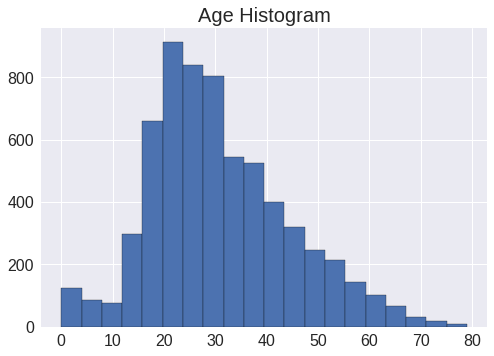

In [38]:
#Histogram ("Age" column)
plt.style.use("seaborn")
train_imputed["Age"].hist(bins = 20, edgecolor = "black");
plt.title("Age Histogram", fontsize = 20)
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

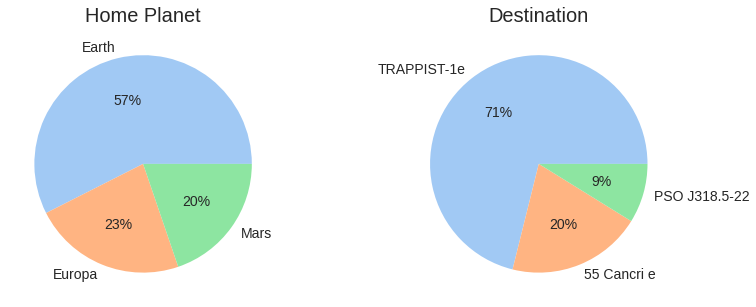

In [39]:
#Pie Chart
plt.figure(figsize = (13,5))

#"HomePlanet"
plt.subplot(1,2,1)
homep_counts = train_imputed["HomePlanet"].value_counts()
labels = ["Earth", "Europa", "Mars"]
colors = sns.color_palette('pastel')[0:5]

plt.pie(homep_counts, labels = labels, textprops={'fontsize': 14}, colors = colors, autopct='%.0f%%');
plt.title("Home Planet", fontsize = 20);

#"Destination"
plt.subplot(1,2,2)
destination_counts = train_imputed["Destination"].value_counts()
labels = ["TRAPPIST-1e", "55 Cancri e", "PSO J318.5-22"]
colors = sns.color_palette('pastel')[0:5]

plt.pie(destination_counts, labels = labels, textprops={'fontsize': 14}, colors = colors, autopct='%.0f%%');
plt.title("Destination", fontsize = 20);

<ipython-input-40-909e1ce852f5>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
<ipython-input-40-909e1ce852f5>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
<ipython-input-40-909e1ce852f5>:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style

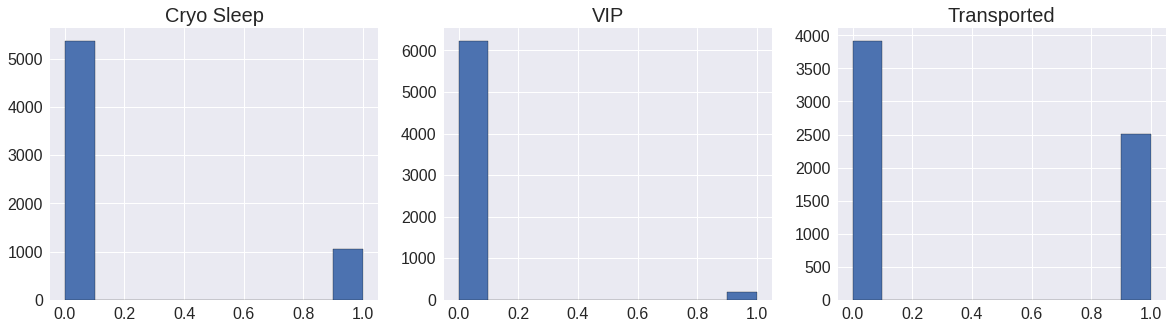

In [40]:
#Histogram 
plt.figure(figsize = (20,5))

#"CryoSleep"
plt.subplot(1,3,1)
plt.style.use("seaborn")
train_imputed["CryoSleep"].astype(int).hist(edgecolor = "black");
plt.title("Cryo Sleep", fontsize = 20)
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

#"VIP"
plt.subplot(1,3,2)
plt.style.use("seaborn")
train_imputed["VIP"].astype(int).hist(edgecolor = "black");
plt.title("VIP", fontsize = 20)
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

#"Transported"
plt.subplot(1,3,3)
plt.style.use("seaborn")
train_imputed["Transported"].astype(int).hist(edgecolor = "black");
plt.title("Transported", fontsize = 20)
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

### **Producir un mapa de calor de correlación e identificar cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra**

In [41]:
#Necesitaremos la librería dython 
#!pip install dython

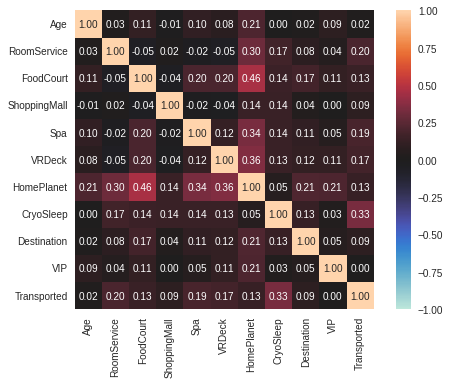

In [44]:
nominal.associations(train_imputed, nominal_columns = ["HomePlanet", "CryoSleep", 
                                                       "Destination", "VIP", 
                                                       "Transported"]);